In [1]:
import tensorflow as tf
import numpy as np

D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [23]:
# visualization
import matplotlib.pyplot as plt


def plot_function(x, y):
    # param:起点，终点，间距
    plt.plot(x, y)
    plt.show()

实现softmax 函数

In [60]:
def softmax(x):
    exp_x = np.exp(x)
   # prob = np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)
    prob = exp_x / np.sum(exp_x, axis=1).reshape(-1, 1)
    return prob

def softmax_stable(x):
    exps = np.exp(x-np.max(x))
    return exps / np.sum(exps)

In [61]:
test_data = np.random.normal(size=[3,2])
softmax(test_data),

(array([[0.79535935, 0.20464065],
        [0.25209807, 0.74790193],
        [0.17644861, 0.82355139]]),)

In [62]:
(softmax_stable(test_data) - tf.nn.softmax(test_data, axis=-1))**2 <0.0001

<tf.Tensor: id=288, shape=(3, 2), dtype=bool, numpy=
array([[False, False],
       [False, False],
       [False, False]])>

In [57]:
(softmax(test_data) - tf.nn.softmax(test_data, axis=-1))**2 <0.0001

<tf.Tensor: id=279, shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

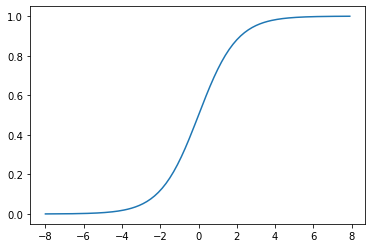

In [52]:
def sigmoid(x):
    prob_x = 1./(1+np.exp(-x))
    return prob_x
x = np.arange(-8, 8, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [35]:
test_data = np.random.normal(size=[10, 5])
(sigmoid(test_data) - tf.nn.sigmoid(test_data))**2 < 0.0001

<tf.Tensor: id=34, shape=(10, 5), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])>

实现 softmax 交叉熵loss函数

In [125]:
def softmax_ce(x, label):
    ##########
    '''实现 softmax 交叉熵loss函数， 不允许用tf自带的softmax_cross_entropy函数'''
    ##########
    p = softmax(x)
    #print(p)
    loss_ = -label*np.log2(p) - (1-label)*np.log2(1-p)
    loss = np.sum(loss_, axis=1)
    print("总损失函数",loss)
    return loss


def cross_entropy(a, y):
    
    return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

In [126]:
test_data = np.random.normal(size=[10, 5])
prob = tf.nn.softmax(test_data)
label = np.zeros_like(test_data)
label[np.arange(10), np.random.randint(0, 5, size=10)]=1.

tf_ans = tf.nn.softmax_cross_entropy_with_logits(label, test_data)
ans = tf.reduce_mean(tf_ans)
print(tf_ans,'\n',"loss:", ans)

((ans - softmax_ce(prob, label))**2 < 0.0001).numpy()

tf.Tensor(
[1.14003542 1.52388147 0.70366911 2.49949098 3.60680712 2.44084814
 2.17818383 1.24303022 3.26341722 3.5740287 ], shape=(10,), dtype=float64) 
 loss: tf.Tensor(2.2173392193230272, shape=(), dtype=float64)
总损失函数 [3.44540877 3.58573028 3.08690021 3.84470497 3.92396319 3.82632691
 3.80195249 3.45494789 3.93682278 3.95226647]


array([False, False, False, False, False, False, False, False, False,
       False])

In [87]:
((tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(label, test_data))
  - cross_entropy(prob, label))**2 < 0.0001).numpy()

False

实现 sigmoid 交叉熵loss函数

In [130]:
def sigmoid_ce(x, label):
    ##########
    '''实现 softmax 交叉熵loss函数， 不允许用tf自带的softmax_cross_entropy函数'''
    ##########
    p = sigmoid(x)
    #print(p)
    loss_ = -label*np.log(p) - (1-label)*np.log(1-p)
    loss = np.sum(loss_)
    print(loss)
    return loss

In [131]:
test_data = np.random.normal(size=[10])
prob = tf.nn.sigmoid(test_data)
label = np.random.randint(0, 2, 10).astype(test_data.dtype)

print ("labe:", label)
print(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(label, test_data)))
((tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(label, test_data))- sigmoid_ce(prob, label))**2 < 0.0001).numpy()

labe: [1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
tf.Tensor(0.6228299935913357, shape=(), dtype=float64)
7.27041487531365


False